In [249]:
from analyzer import *
from schedule_gen import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [208]:
%matplotlib inline  
plt.rcParams['figure.figsize'] = [20, 10]
plt.rc("font", size=14)

In [12]:
import importlib

In [15]:
importlib.reload(analyzer)

<module 'analyzer' from '/home/cjdavis/github/Football-analysis/analyzer.py'>

In [2]:
schedules_to_make = 1000000
number_of_players = 12
repeat_weeks = 2
season_length = 13

In [3]:
list_of_schedules = generate_schedules(schedules_to_make, number_of_players, repeat_weeks, season_length)

Generating schedules
Good schedule #1! schedule 117 of 1000000 complete
Good schedule #2! schedule 126 of 1000000 complete
Good schedule #3! schedule 424 of 1000000 complete
Good schedule #4! schedule 549 of 1000000 complete
Good schedule #5! schedule 839 of 1000000 complete
Good schedule #6! schedule 933 of 1000000 complete
Good schedule #7! schedule 964 of 1000000 complete
Good schedule #8! schedule 1090 of 1000000 complete
Good schedule #9! schedule 1100 of 1000000 complete
Good schedule #10! schedule 1147 of 1000000 complete
Good schedule #11! schedule 1206 of 1000000 complete
Good schedule #12! schedule 1325 of 1000000 complete
Good schedule #13! schedule 1637 of 1000000 complete
Good schedule #14! schedule 1911 of 1000000 complete
Good schedule #15! schedule 1924 of 1000000 complete
Good schedule #16! schedule 1998 of 1000000 complete
Good schedule #17! schedule 2024 of 1000000 complete
Good schedule #18! schedule 2040 of 1000000 complete
Good schedule #19! schedule 2427 of 10000

In [5]:
len(list_of_schedules)

6639

In [221]:
scores = analyzer.get_scores(2019)
schedule_2019 = analyzer.get_schedule(2019)

In [33]:
cols = []
for player in get_players():
    cols.append(player.name)
cols

['Chris',
 'Todd',
 'Andy',
 'Greg',
 'Aaron',
 'Robert',
 'Tyler',
 'Stephen',
 'Travis',
 'Mark',
 'Noel',
 'Eric']

In [103]:
df = pd.DataFrame(columns = cols)

In [106]:
for i in range(0, len(list_of_schedules)):
    ranks = []
    for player in range(0, 12):
        ranks.append(calculate_rank(player, list_of_schedules[i], scores, season_length, number_of_players))

    ranks = np.asarray(ranks)
    df.loc[i] = ranks

In [294]:
df.corr()

,Chris,Todd,Andy,Greg,Aaron,Robert,Tyler,Stephen,Travis,Mark,Noel,Eric
Chris,1.000000,-0.105703,-0.078327,0.004402,-0.053597,0.010732,-0.183175,-0.161553,-0.083141,-0.216374,-0.118413,-0.120912
Todd,-0.105703,1.000000,-0.008858,-0.013530,0.031079,0.011993,-0.163525,-0.108205,-0.011754,-0.052129,-0.008199,0.017218
Andy,-0.078327,-0.008858,1.000000,-0.012342,-0.183522,0.004458,-0.081702,-0.027594,-0.223461,-0.102555,-0.153873,-0.162813
Greg,0.004402,-0.013530,-0.012342,1.000000,-0.148879,-0.630047,0.001029,0.001519,0.016789,0.026831,-0.021363,-0.014854
Aaron,-0.053597,0.031079,-0.183522,-0.148879,1.000000,-0.103912,-0.031101,-0.032712,-0.174630,-0.075931,-0.132295,-0.168365
Robert,0.010732,0.011993,0.004458,-0.630047,-0.103912,1.000000,0.015474,-0.007734,-0.075812,-0.000194,0.001626,0.016483
Tyler,-0.183175,-0.163525,-0.081702,0.001029,-0.031101,0.015474,1.000000,-0.279266,-0.034162,-0.159979,-0.059199,-0.082878
Stephen,-0.161553,-0.108205,-0.027594,0.001519,-0.032712,-0.007734,-0.279266,1.000000,-0.044600,-0.193227,-0.071811,0.006124
Travis,-0.083141,-0.011754,-0.223461,0.016789,-0.174630,-0.075812,-0.034162,-0.044600,1.000000,-0.069161,-0.214307,-0.188238
Mark,-0.216374,-0.052129,-0.102555,0.026831,-0.075931,-0.000194,-0.159979,-0.193227,-0.069161,1.000000,-0.098318,-0.083258


In [299]:
print(df.corr().replace(1.0, np.nan).min())
print(df.corr().replace(1.0, np.nan).max())

Chris     -0.216374
Todd      -0.163525
Andy      -0.223461
Greg      -0.630047
Aaron     -0.183522
Robert    -0.630047
Tyler     -0.279266
Stephen   -0.279266
Travis    -0.223461
Mark      -0.216374
Noel      -0.214307
Eric      -0.203055
dtype: float64
Chris      0.010732
Todd       0.031079
Andy       0.004458
Greg       0.026831
Aaron      0.031079
Robert     0.016483
Tyler      0.015474
Stephen    0.006124
Travis     0.016789
Mark       0.026831
Noel       0.001626
Eric       0.017218
dtype: float64


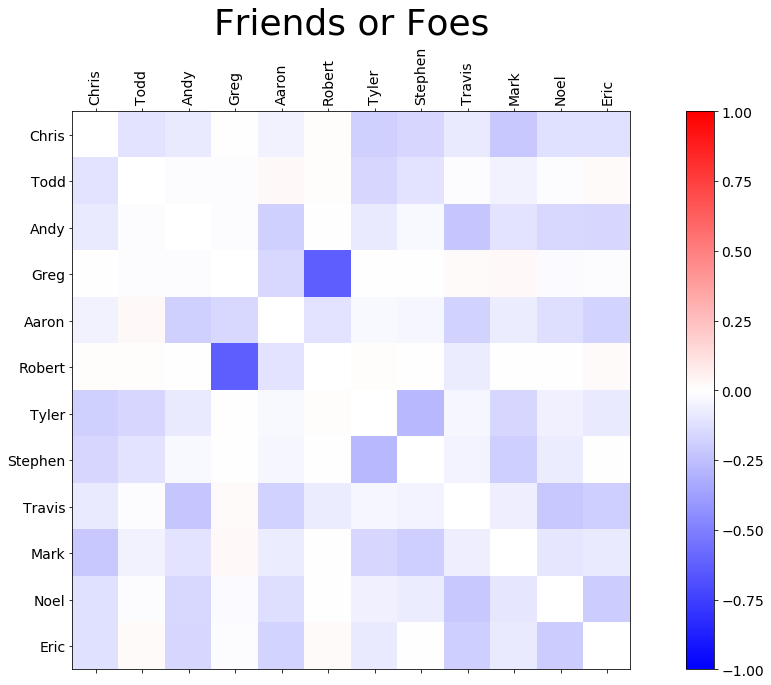

In [295]:
f = plt.figure(figsize=(20, 10))
plt.matshow(df.corr().replace(1.0, np.nan), fignum=f.number, cmap = "bwr", vmax = 1, vmin = -1)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Friends or Foes', fontsize=36, pad = 50);

In [159]:
df = df.astype('int')

In [160]:
df.dtypes

Chris      int64
Todd       int64
Andy       int64
Greg       int64
Aaron      int64
Robert     int64
Tyler      int64
Stephen    int64
Travis     int64
Mark       int64
Noel       int64
Eric       int64
dtype: object

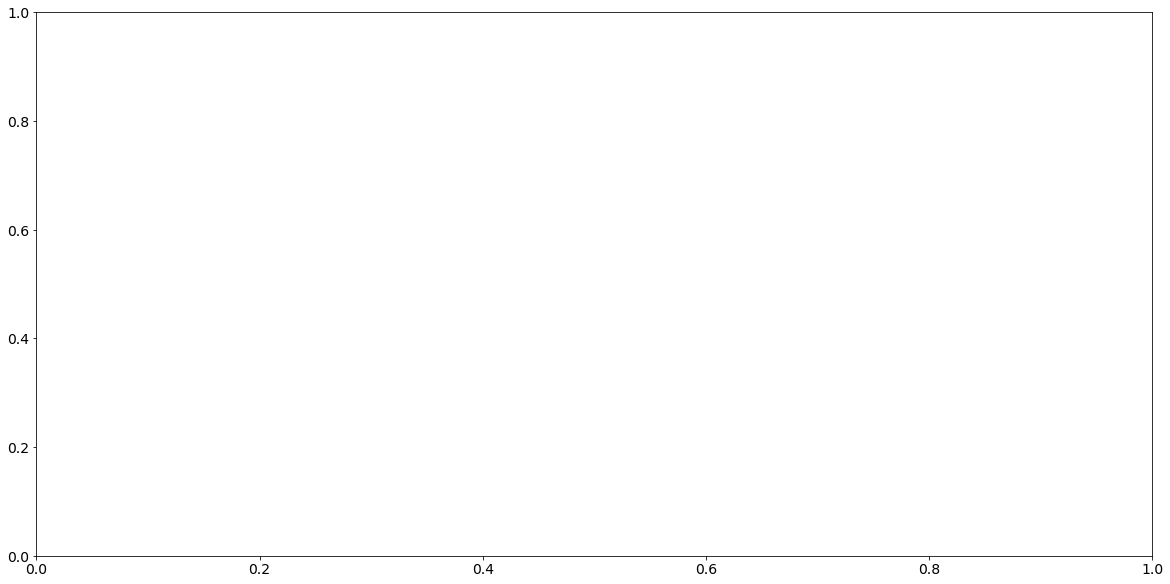

In [242]:
fig, ax = plt.subplots()

In [ ]:
    
    actual_ranks= []
percent_better = []
percent_worse = []
percent_playoffs = []

In [261]:
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Rectangle

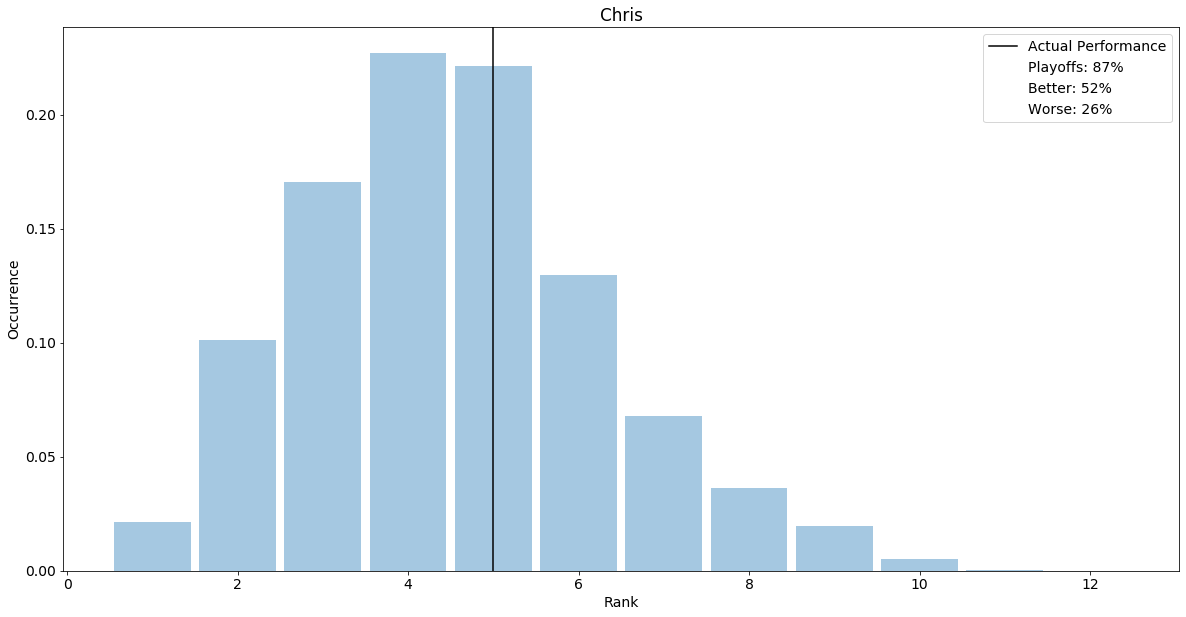

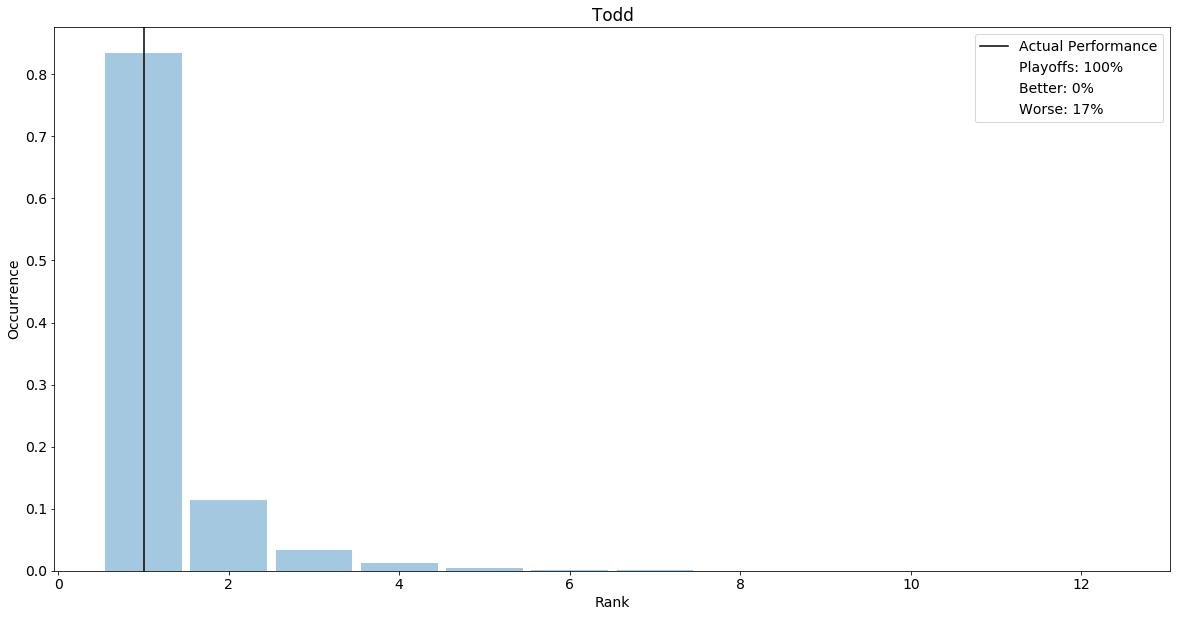

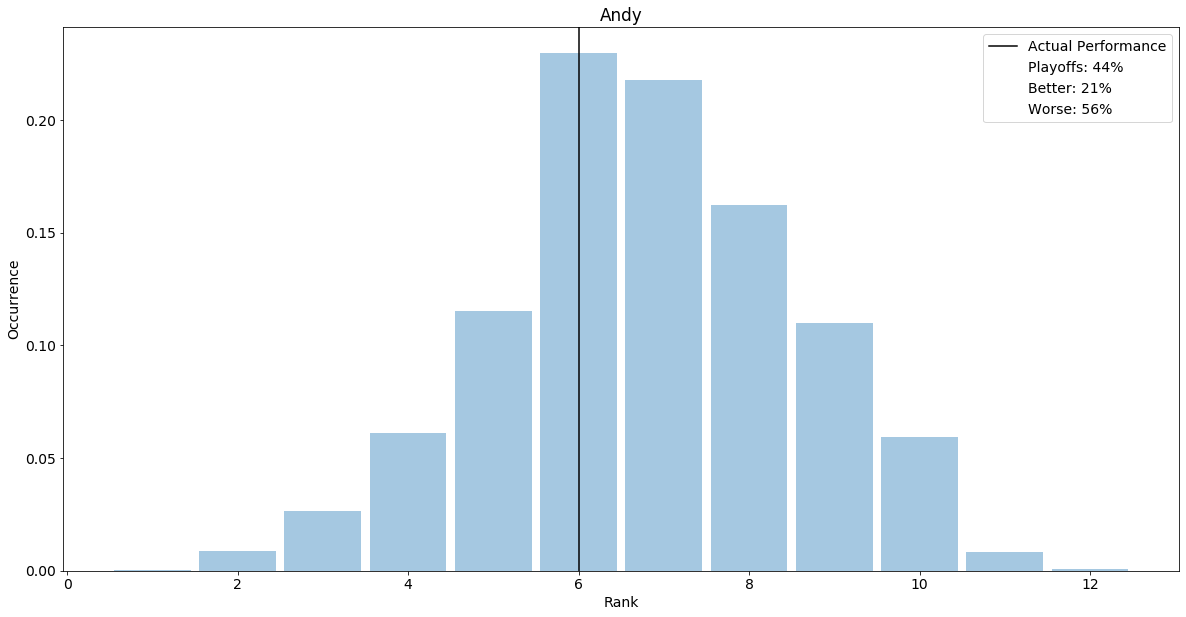

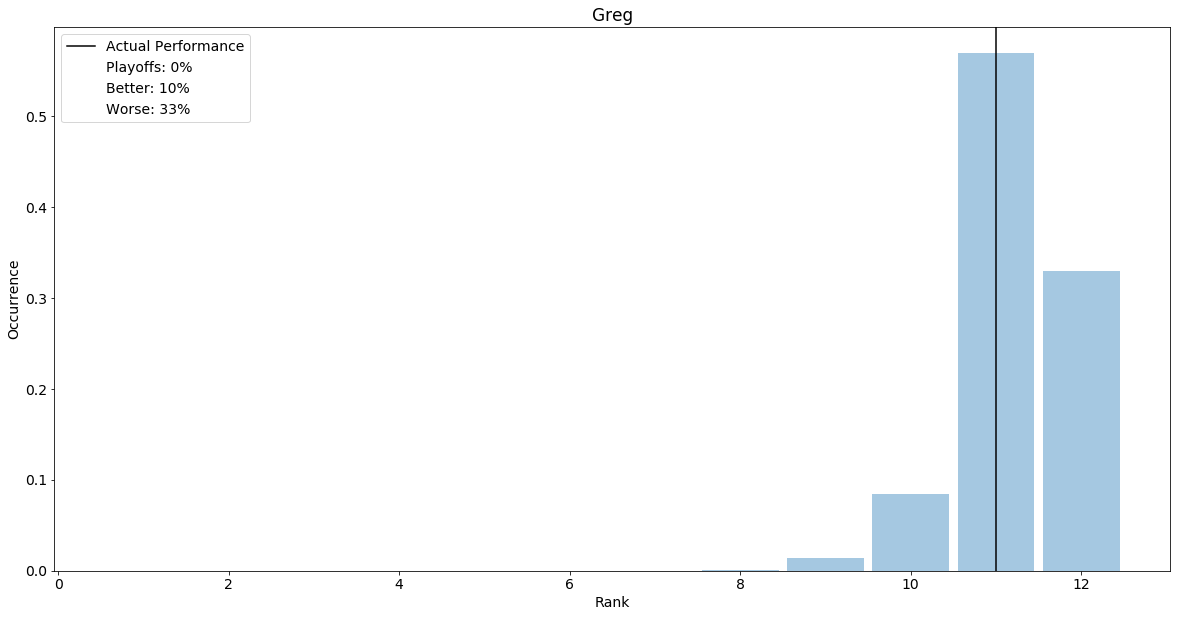

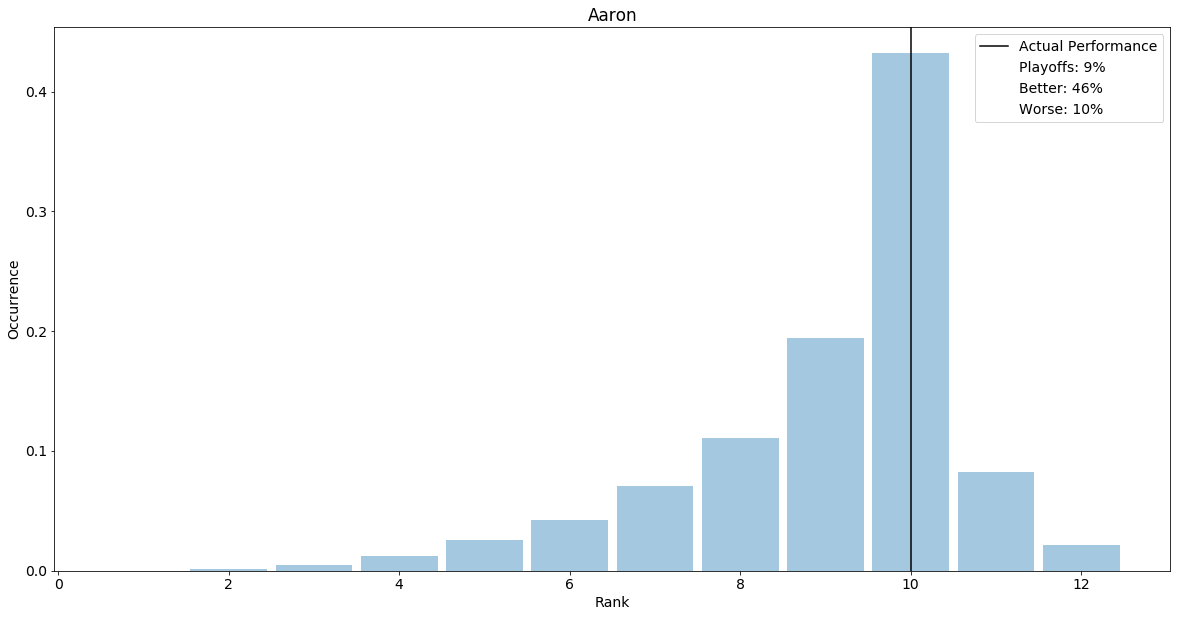

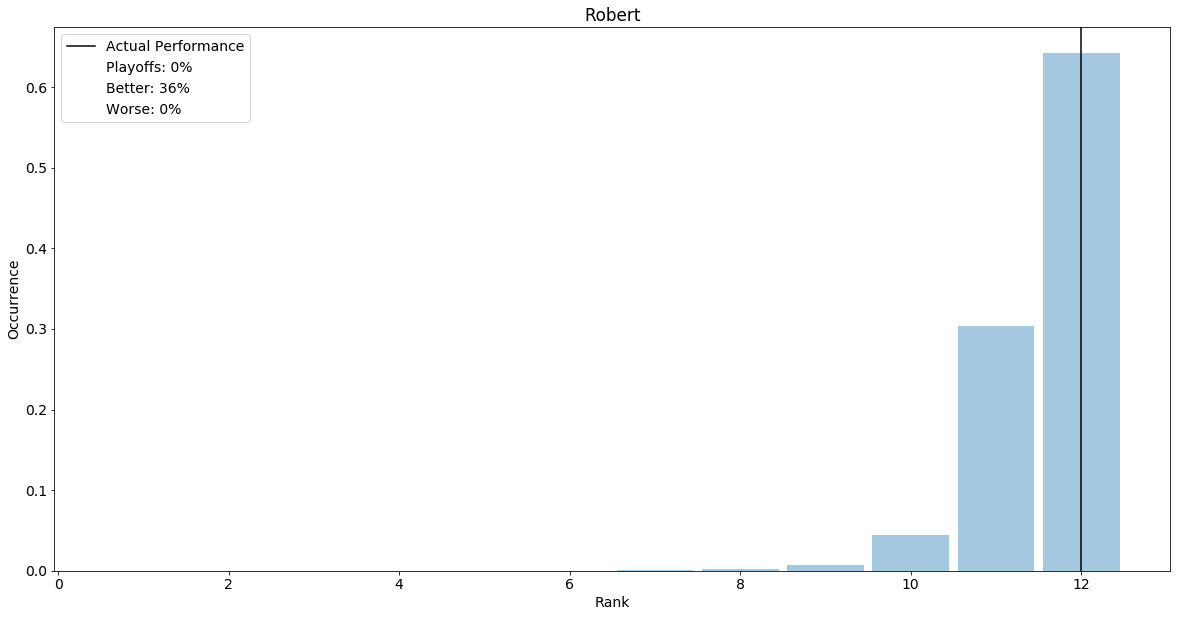

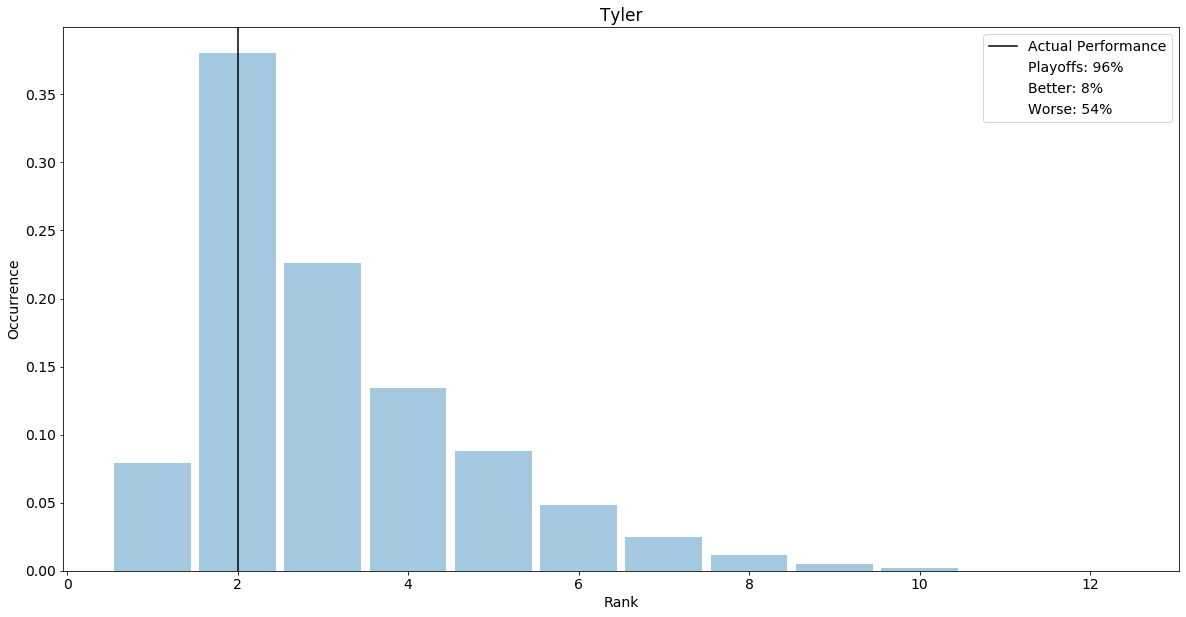

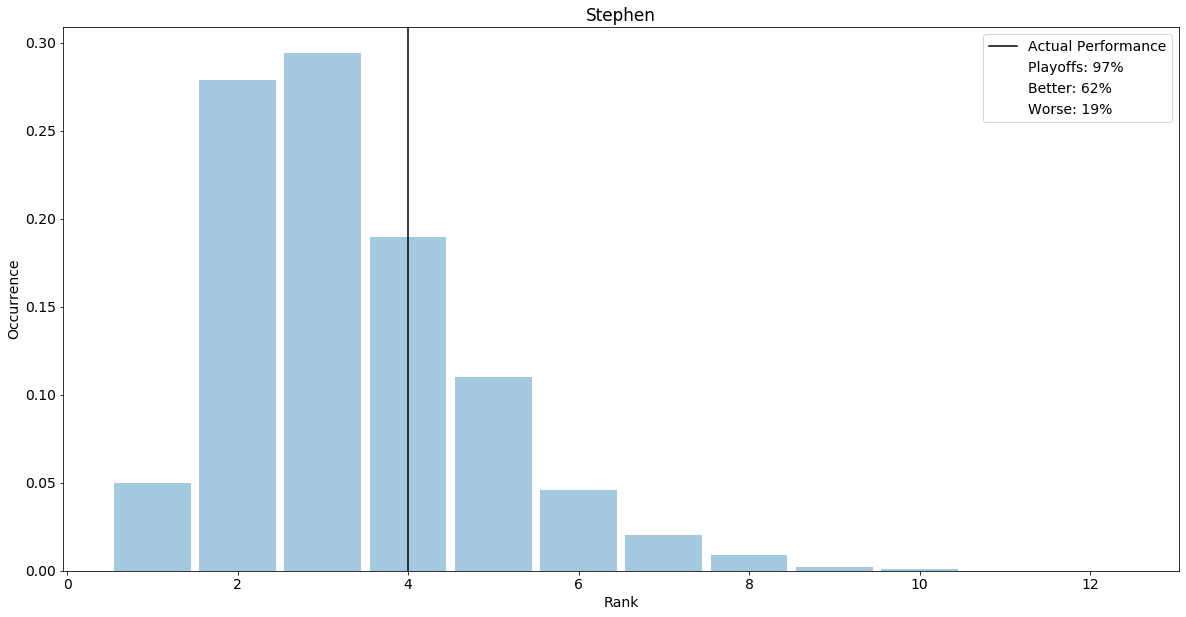

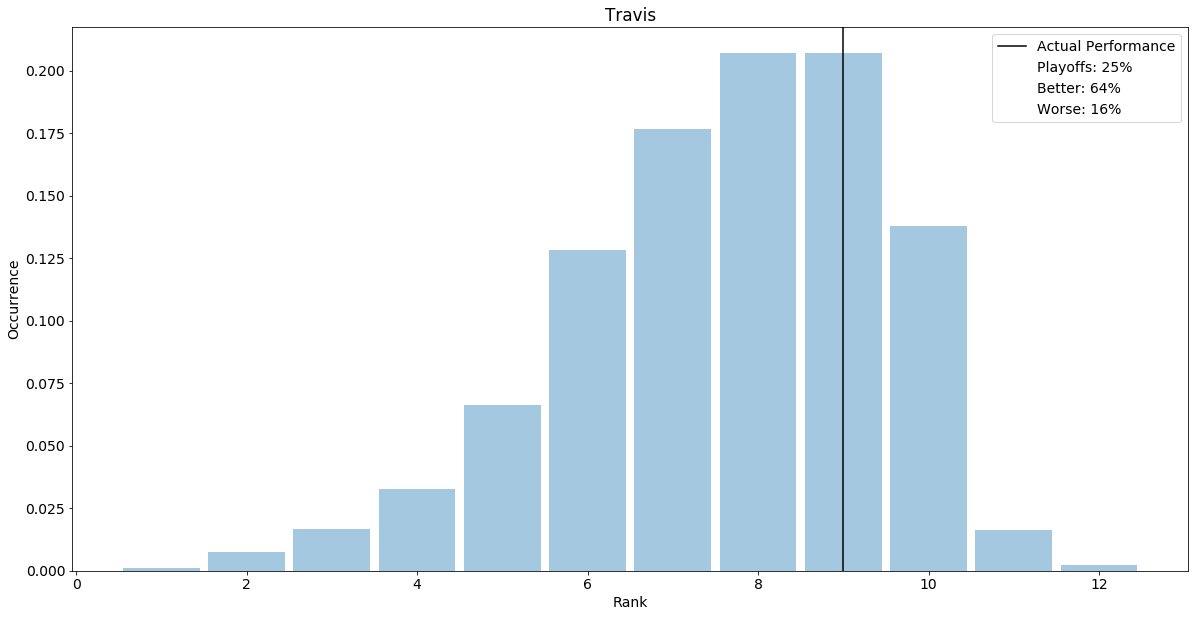

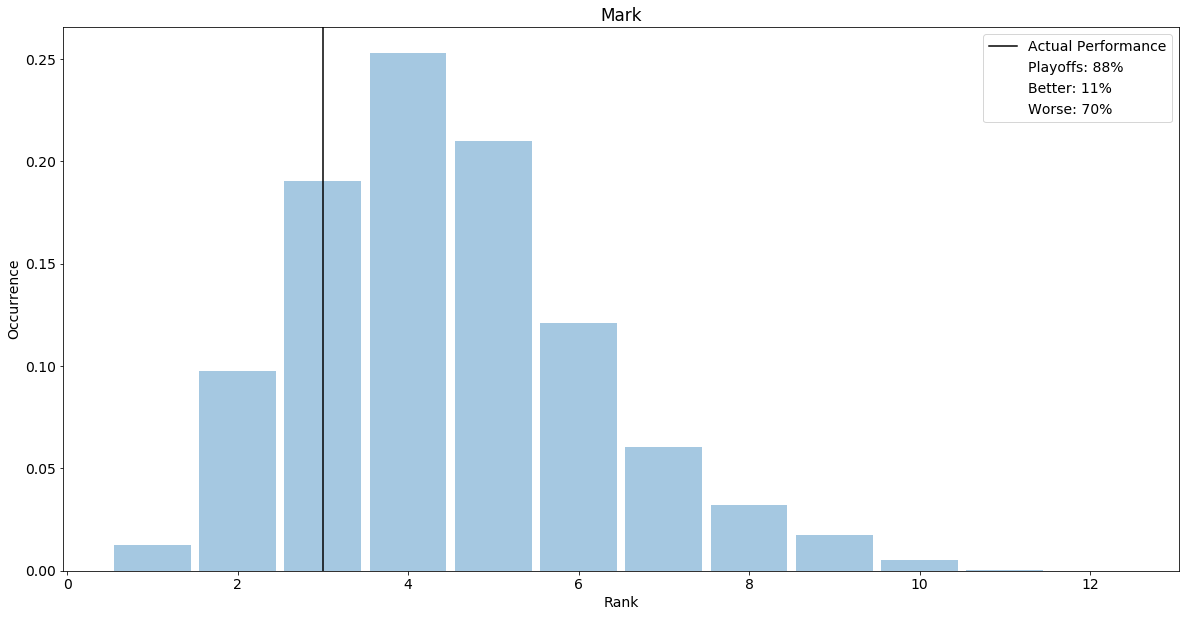

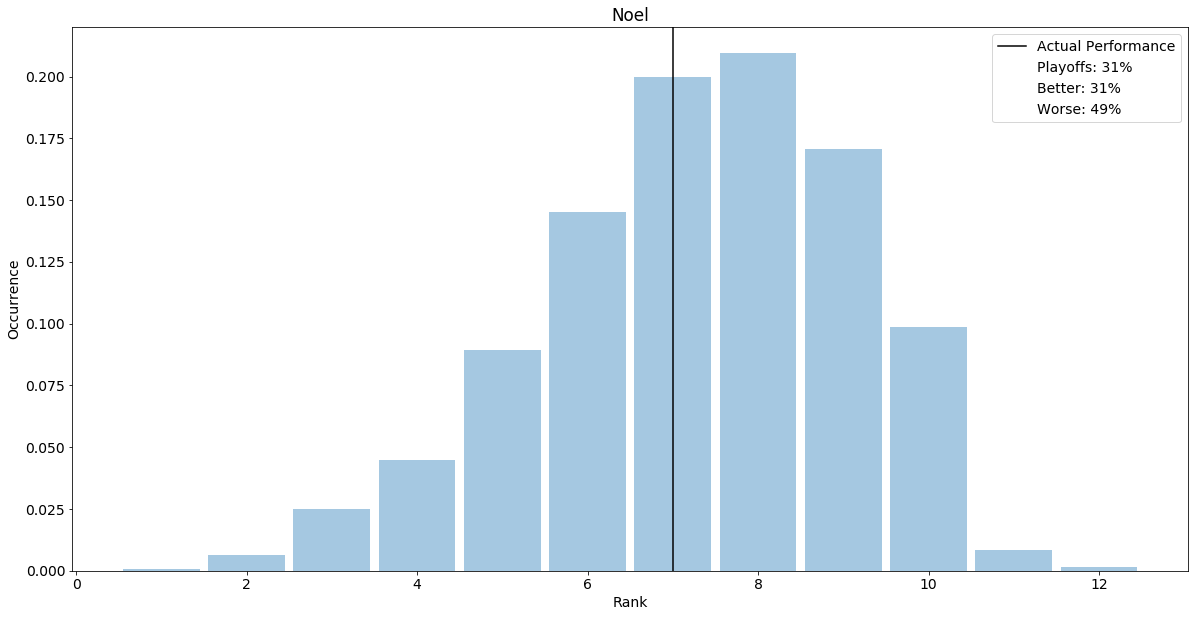

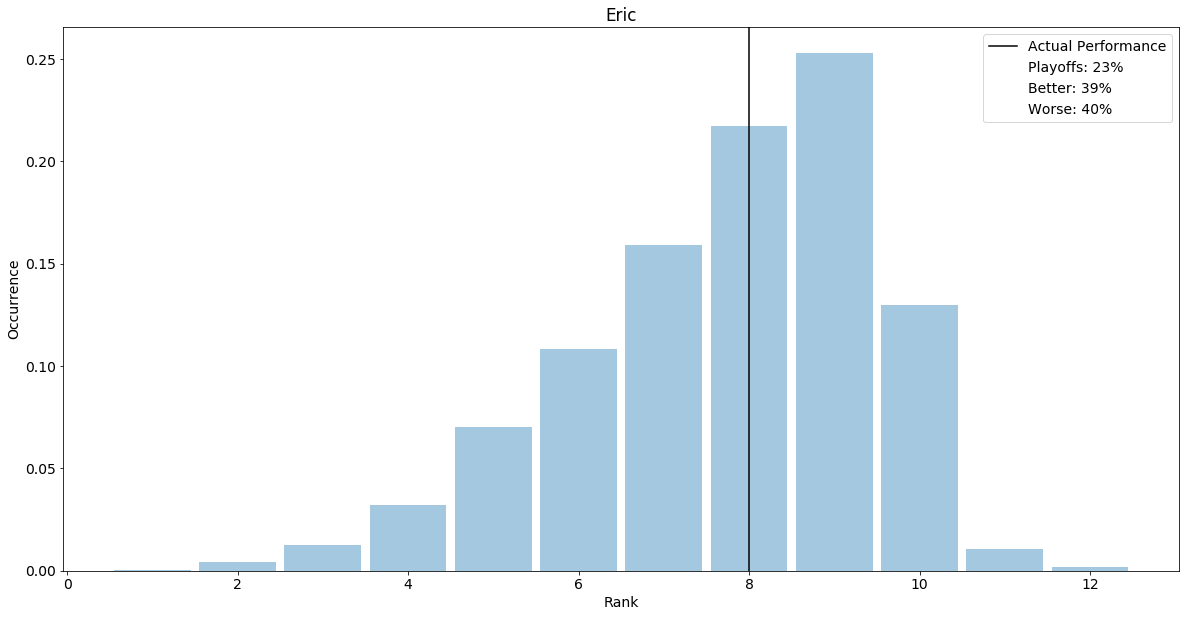

In [292]:
for i in range(0, len(cols)):
    #fig, ax = plt.subplots()
    col = cols[i]
    sns.distplot(df[col], kde = False, norm_hist = True, bins = 12, hist_kws = {"range": (1, 13), 'rwidth': 0.9, 'align': 'left'})
    plt.axvline(actual_ranks[i], color = "black", label = "Actual Performance")
    plt.plot([], [], ' ', label = f"Playoffs: {percent_playoffs[i]:.0f}%")
    plt.plot([], [], ' ', label = f"Better: {percent_better[i]:.0f}%")
    plt.plot([], [], ' ', label = f"Worse: {percent_worse[i]:.0f}%")

    plt.title(col)
    #anchored_text = AnchoredText("Test", loc= 2)
    #ax.add_artist(anchored_text)
    plt.xlabel("Rank")
    plt.ylabel("Occurrence")
    plt.legend()
    plt.savefig(f"Plots/2019_{col}.pdf")

    
    plt.show()


In [229]:
def player_plot(player, player_name, list_of_schedules, scores, season_length, number_of_players):
    player_ranks = []
    schedule_2019 = analyzer.get_schedule(2019)
    
    
    for schedule in list_of_schedules:
        player_ranks.append(calculate_rank(player, schedule, scores, season_length, number_of_players))

    plt.hist(player_ranks, density=1, rwidth = 0.9, bins = range(1,14), align='left')
    plt.ylabel('Probability')
    plt.xlabel('Rank')
    plt.title(player_name+" Rankings")
    
    actual_rank = calculate_rank(player, schedule_2019, scores, season_length, number_of_players)
    percent_better = 0
    percent_worse = 0
    percent_playoffs = 0
    for rank in player_ranks:
        if rank > actual_rank:
            percent_worse = percent_worse + 1
        if rank < actual_rank: 
            percent_better = percent_better + 1
        if rank <= 6:
            percent_playoffs = percent_playoffs + 1
    percent_playoffs = float(percent_playoffs / len(player_ranks)) * 100
    percent_worse = float(percent_worse / len(player_ranks)) * 100
    percent_better = float(percent_better / len(player_ranks)) * 100
    

    print(f"Actual rank: {actual_rank}")
    print(f"Percent better: {percent_better:.0f}")
    print(f"Percent worse: {percent_worse:.0f}")
    print(f"Percent playoffs: {percent_playoffs:.0f}")
    
    return actual_rank, percent_better, percent_worse, percent_playoffs
    
    #plt.savefig(f'Plots/{player_name}Rankings.png', dpi=400)

In [220]:
number_of_players

12

Chris:
Actual rank: 5
Percent better: 52
Percent worse: 26
Percent playoffs: 87

Todd:
Actual rank: 1
Percent better: 0
Percent worse: 17
Percent playoffs: 100

Andy:
Actual rank: 6
Percent better: 21
Percent worse: 56
Percent playoffs: 44

Greg:
Actual rank: 11
Percent better: 10
Percent worse: 33
Percent playoffs: 0

Aaron:
Actual rank: 10
Percent better: 46
Percent worse: 10
Percent playoffs: 9

Robert:
Actual rank: 12
Percent better: 36
Percent worse: 0
Percent playoffs: 0

Tyler:
Actual rank: 2
Percent better: 8
Percent worse: 54
Percent playoffs: 96

Stephen:
Actual rank: 4
Percent better: 62
Percent worse: 19
Percent playoffs: 97

Travis:
Actual rank: 9
Percent better: 64
Percent worse: 16
Percent playoffs: 25

Mark:
Actual rank: 3
Percent better: 11
Percent worse: 70
Percent playoffs: 88

Noel:
Actual rank: 7
Percent better: 31
Percent worse: 49
Percent playoffs: 31

Eric:
Actual rank: 8
Percent better: 39
Percent worse: 40
Percent playoffs: 23



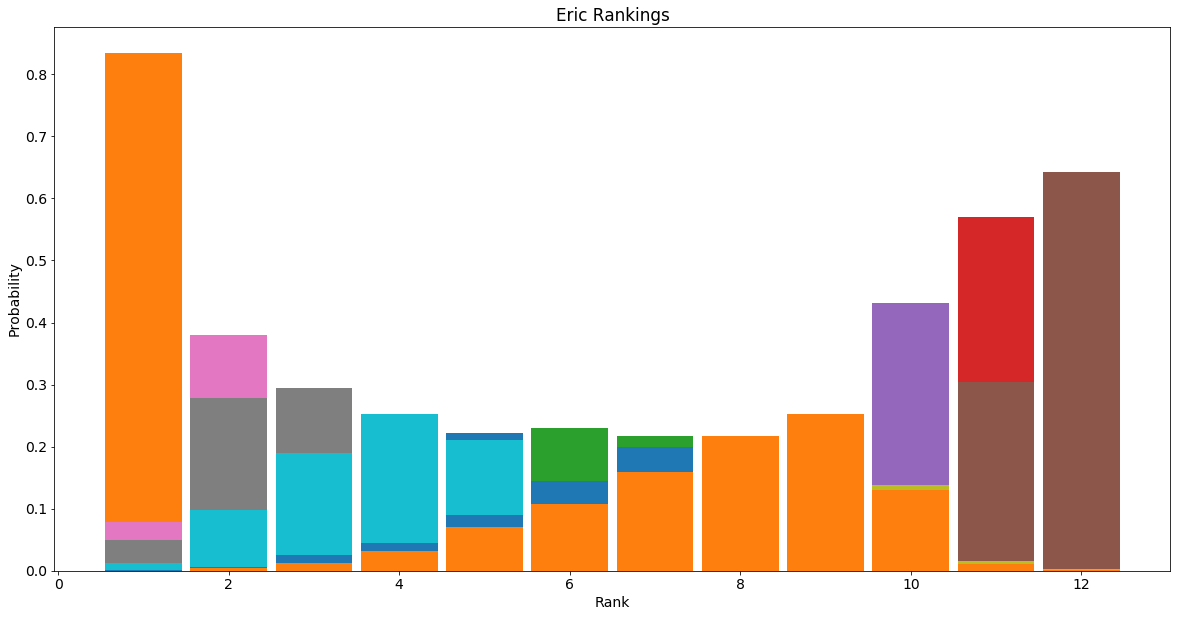

In [233]:
actual_ranks= []
percent_better = []
percent_worse = []
percent_playoffs = []
for i in range(0, len(cols)):
    col = cols[i]
    print(f"{col}:")
    x = player_plot(i, col, list_of_schedules, scores, season_length, number_of_players)
    actual_ranks.append(x[0])
    percent_better.append(x[1])
    percent_worse.append(x[2])
    percent_playoffs.append(x[3])
    print()